Reid Miller, Henry Miller:

[Data Science Project](https://github.com/reidm340/reidm340.github.io)

# Final Tutorial: How to Win Fantasy Basketball

# Introduction

For our project, our group (Henry Miller and Reid Miller) will be attempting to predict the best choices for fantasy basketball leagues. The question we are asking is what stats from the previous season will result in a undervalued fantasy basketball draft pick in the following season?

**Our Goal:** Because our project is based on fantasy basketball, the goal of our project is to maximize fantasy points. To do that we need to make a new column that stores how many fantasy points each player gets on a normal season for them. We will also calculate how many fantasy points each player on average per game. The distinction between the two are important. The star players in the nba tend to do something called "load management" which is another word for rest to prevent injuries. Therefore star players occasonally will score more points on average for the games they play but will have less total fantasy points in a season compared to non-star players.

For our project we will be using the [ESPN default fantasy points](https://www.espn.com/fantasy/basketball/story/_/id/30296896/espn-fantasy-default-points-league-scoring-explained) which is as follows;

Point = 1

3PM = 1

FGA = -1

FG = 2

FTA = -1

FT = 1

TRB = 1

AST = 2

STL = 4

BLK = 4

(Reference loading in the dataset for the explination of the abriviations)

For this project, we unitlized Python 3, pandas, maplotlib, and more. Our first code cell will be importing the necessary libraries.

In [40]:
!git clone https://github.com/reidm340/reidm340.github.io
%cd /content/reidm340.github.io/raw_data

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
from itertools import cycle
import seaborn as sns
pd.options.mode.chained_assignment = None

Cloning into 'reidm340.github.io'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 25), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (61/61), 1.88 MiB | 3.89 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/reidm340.github.io/raw_data


# Formating The Data

##Loading in the data set

This dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/raunakpandey030/nba-player-stats/data). It contains all of the nba individual player stats from 1997-98 season through 2021-22 season.

To load this data, I utilized pandas' read_csv(). The head of the table (without any transformation or cleaning) is displayed below.

In [41]:
nbaPStats = pd.read_csv('NBA_Player_Stats_2.csv')

In [42]:
nbaPStats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


This data (as shown above) contains data on every NBA player from the 1996-97 season through the 2021-22 season, along with the following information: Player (player's name), Pos (position), Age (player's age), G (games played), GS (games started), MP (minutes played), FG (field goals made), FGA (field goals attempted), FG% (field goal percentage), 3P (3-pointers made), 3PA (3-pointers attempted), 3P% (3-point percentage), 2P (2-pointers made), 2PA (2-pointers attempted), 2P% (2-point percentage), eFG% (effective field goal percentage), FT (free throws made), FTA (free throws attempted), FT% (free throw percentage), ORB (offensive rebounds), DRB (defensive rebounds), TRB (total rebounds), AST (assists), STL (steals), BLK (blocks), TOV (turnovers), PF (personal fouls), PTS (points), Season (season these stats are for), and MVP (boolean value which is 1 when the player wins MVP). All stats are measured on a per-game average.

This dataset will be extremely useful because it contains all the stats that are used in fantasy basketball scoring for such a large sample of players and seasons. While there are a variety of scoring systems used in different fantasy basketball leagues (Rotisserie, Season Points, Head-to-Head: Points, Head-to-Head: Each Category), they are all based on the information above in some form. This means that we will be able to accurately recreate any individual’s fantasy output from any of these seasons, and that we will able to analyze the stats that directly affect fantasy success.

With this data we wondering what the biggest factors are when it comes to fantasy basketball. The question we are asking is what stats from the previous season will result in a undervalued fantasy basketball draft pick in the following season?

## Tidying the data

###dtype check

Here we are double checking that python has the correct dtype of each of our columns so we can manipulate the data properly.

In [43]:
nbaPStats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Season     object
MVP          bool
dtype: object

These are exactly what we want from our dtypes.

###Cleaning NaN values

Now let's check if there are any NaN values, which are cells that contain no data and can throw off analysis.


In [44]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    11962
True      2611
Name: count, dtype: int64

It seems as if there are 2611 rows that contain NaN values out of the total 14573 total rows, which is a significant margin. After some analysis, we found that all NaN values exist in aggergate precentage columns where the player had made no attempts. Therefore since the a player not take any 3 point shots, for example, we can say that their 3 point percentage is 0%. Therefore I am going to relace all NaN values with 0

In [45]:
nbaPStats = nbaPStats.fillna(0)

In [46]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    14573
Name: count, dtype: int64

Now we have no NaN values and our data is cleaner.

###Getting rid of unuseful data

Now to remove the irrelevant 'Rk' column.

In [47]:
nbaPStats.pop('Rk')
nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


No more 'Rk' values, so this was successful!

###Adding useful data columns

We are going to add a column for true shooting percentage, which combines all types of scoring to aproximate how effecient of a shooter a certain player is. This is a standardized calculation that is used commonly by teams and pundits around the NBA.

In [48]:
nbaPStats['TS%'] = (nbaPStats['PTS']/2) / (nbaPStats['FGA'] + (nbaPStats['FTA'] * 0.475))
nbaPStats['TS%']

0        0.403873
1        0.450863
2        0.554588
3        0.539461
4        0.514286
           ...   
14568    0.527197
14569    0.597455
14570    0.538344
14571    0.625752
14572    0.649842
Name: TS%, Length: 14573, dtype: float64

Now we have the true shooting precentage of every player.

Now we add the fantasy points columns to our dataset:

(FP = fantasy points and FPA = fantasy points average)

In [49]:
# calculating total fantasy points
nbaPStats['FP'] = (nbaPStats['PTS'] + nbaPStats['3P'] - nbaPStats['FGA']
                   + (2 * nbaPStats['FG']) - nbaPStats['FTA'] + nbaPStats['FT'] + nbaPStats['TRB']
                   + (2 * nbaPStats['AST']) + (4 * nbaPStats['STL']) + (4 * nbaPStats['BLK'])) * nbaPStats['G']

# calculating fantasy points average
nbaPStats['FPA'] = (nbaPStats['PTS'] + nbaPStats['3P'] - nbaPStats['FGA'] + (2 * nbaPStats['FG']) - nbaPStats['FTA'] + nbaPStats['FT'] + nbaPStats['TRB'] + (2 * nbaPStats['AST']) + (4 * nbaPStats['STL']) + (4 * nbaPStats['BLK']))

nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Season,MVP,TS%,FP,FPA
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,0.5,0.0,0.6,1.0,7.3,1997-98,False,0.403873,381.3,12.3
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,0.6,0.2,1.1,1.4,6.4,1997-98,False,0.450863,678.5,11.5
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,1.1,0.9,3.1,2.5,22.3,1997-98,False,0.554588,3345.6,40.8
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,1.2,0.2,1.9,1.6,8.1,1997-98,False,0.539461,1374.0,22.9
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,0.7,0.1,1.3,1.4,4.5,1997-98,False,0.514286,455.1,12.3


Since we are interested in looking at the relationship between player statistics and their relationship with their fantasy performance for the next season, we add two more columns, next_FP and next_FPA. These variables stand for the players fantasy points and fantasy point average in the following season. If this number is -1, it means the player did not play in the following season.

In [50]:
def get_next_FP(row):
    player = row["Player"]
    season = row["Season"]

    # Get following season
    season_yr1 = int(season[:4])
    season_yr2 = int(season[-2:])
    next_season = (str(season_yr1 + 1) + "-0" + str(season_yr2 + 1)) if season_yr2 < 10 else (str(season_yr1 + 1) + "-" + str(season_yr2 + 1))

    # Find player's stats for the following season
    player_year = nbaPStats.loc[(nbaPStats["Player"] == player) & (nbaPStats["Season"] == next_season)]

    if player_year.empty:
        next_FP = -1
    else:
        # Calculate total fantasy points
        fantasy_stats = (player_year['PTS'] + player_year['3P'] - player_year['FGA'] + (2 * player_year['FG']) - player_year['FTA'] + player_year['FT'] + player_year['TRB'] + (2 * player_year['AST']) + (4 * player_year['STL']) + (4 * player_year['BLK']))

        # Calculate total and average fantasy points
        next_FP = (fantasy_stats * player_year["G"]).iloc[0]  # Extract the float value

    return next_FP

In [51]:
def get_next_FPA(row):
    player = row["Player"]
    season = row["Season"]

    # Get following season
    season_yr1 = int(season[:4])
    season_yr2 = int(season[-2:])
    next_season = (str(season_yr1 + 1) + "-0" + str(season_yr2 + 1)) if season_yr2 < 10 else (str(season_yr1 + 1) + "-" + str(season_yr2 + 1))

    # Find player's stats for the following season
    player_year = nbaPStats.loc[(nbaPStats["Player"] == player) & (nbaPStats["Season"] == next_season)]

    if player_year.empty:
        next_FP = -1
    else:
        # Calculate total fantasy points
        fantasy_stats = (player_year['PTS'] + player_year['3P'] - player_year['FGA'] + (2 * player_year['FG']) - player_year['FTA'] + player_year['FT'] + player_year['TRB'] + (2 * player_year['AST']) + (4 * player_year['STL']) + (4 * player_year['BLK']))

        # Calculate total and average fantasy points
        next_FP = (fantasy_stats).iloc[0]  # Extract the float value

    return next_FP

In [52]:
nbaPStats["next_FP"] = nbaPStats.apply(get_next_FP, axis=1)
nbaPStats["next_FPA"] = nbaPStats.apply(get_next_FPA, axis=1)

In [53]:
nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Season,MVP,TS%,FP,FPA,next_FP,next_FPA
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,0.6,1.0,7.3,1997-98,False,0.403873,381.3,12.3,-1.0,-1.0
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.1,1.4,6.4,1997-98,False,0.450863,678.5,11.5,901.6,18.4
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,3.1,2.5,22.3,1997-98,False,0.554588,3345.6,40.8,2180.0,43.6
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,1.9,1.6,8.1,1997-98,False,0.539461,1374.0,22.9,691.2,19.2
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,1.3,1.4,4.5,1997-98,False,0.514286,455.1,12.3,691.2,19.2


###Grouping the data

We want to group the data such that we can players are only compared with players in the same season as rule changes and strategies constantly change season to season.

Also players stats depend on the system (strategy) a team plays with. Therefore, we also want to have another data set that isolates our original data set by team and by year at the same time.

In [54]:
PStats_by_year = nbaPStats.groupby(['Season'])

PStats_by_team = nbaPStats.groupby(['Season', 'Tm'])

In [55]:
PStats_by_year.ngroups


25

We have 25 years in this data set so it worked!

In [56]:
PStats_by_team.ngroups

768

Because of NBA expansion teams there have only been 768 teams and not (25*32) 800 teams as you might expect

###Scaling the data

Scaling our data is super important, especially by year. With rule changes and just general progression of the sport of basketball, the way in which the game is played differs from "era to "era". For example, currently there is a new archetype of player which I will call the Wemby architype. He is a tall, thin center with high scoring and blocks. This is different from a Shaq architype that is physical and scores a lot by playing bully ball (From the 2000s). Because of rule changes and advancement in the leauge, a less mobile, physical player may not be as effective as they were in the 2000s. Therefore it is only fair to scale the data by year.

For scaling the data we will be using z-standardization. The stats that we are interested in scaling are FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, FT, FTA, FT%, TS%, FP, FPA.



By having all this data seperated into groups makes this significantly more complicated and is not as straightforward as modifying a normal dataframe. Therefore we have to define a function that does all of the modification and then apply it to the groupby function so that it then runs the function on each dataset within the groupby object. Also by making it a function if we want to do this analysis on any future datasets that we have not created yet, we can just run this instead of modifying the future datasets by hand.

In [57]:
std_year_PStats = PStats_by_year

In [58]:
def calculate_group_stats(group):
    group_stats = {}
    for col in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'TS%', 'FP', 'FPA']:
        group_stats[col] = {
            'mean': group[col].mean(),
            'std': group[col].std()
        }
    return group_stats


In [59]:
def standardize_full(group, group_stats):
    for col, stat in group_stats.items():
        if col in group.columns:
            group[col] = (group[col] - stat['mean']) / stat['std']
    return group

In [60]:
def standardize_groupby(data):
  return data.apply(lambda x: standardize_full(x.copy(), calculate_group_stats(x)))


Now we are going to apply standardization to both the groupby objects. I want to be able to reference the non-standardized data so I am going to make a copy of the groupby object and run it on that copy

In [61]:
by_year = standardize_groupby(std_year_PStats)

by_year

Player Pos  Age   Tm   G  GS    MP        FG  \
Season                                                                     
1997-98 0       Mahmoud Abdul-Rauf  PG   28  SAC  31   0  17.1  0.202621   
        1        Tariq Abdul-Wahad  SG   23  SAC  59  16  16.3 -0.223755   
        2      Shareef Abdur-Rahim  SF   21  VAN  82  82  36.0  2.429253   
        3           Cory Alexander  PG   24  TOT  60  22  21.6  0.013121   
        4           Cory Alexander  PG   24  SAS  37   3  13.5 -0.602756   
...                            ...  ..  ...  ...  ..  ..   ...       ...   
2021-22 14568       Thaddeus Young  PF   33  TOR  26   0  18.3 -0.121059   
        14569           Trae Young  PG   23  ATL  76  76  34.9  2.936435   
        14570       Omer Yurtseven   C   23  MIA  56  12  12.6 -0.255948   
        14571          Cody Zeller   C   29  POR  27   0  13.1 -0.435801   
        14572          Ivica Zubac   C   24  LAC  76  76  24.4  0.553388   

                    FGA       FG%  ...  TOV   PF   PTS   Season    MVP  \
Season                             ...                                   
1997-98 0      0.501620 -0.495831  ...  0.6  1.0   7.3  1997-98  False   
        1     -0.095294 -0.235912  ...  1.1  1.4   6.4  1997-98  False   
        2      2.181825  0.583833  ...  3.1  2.5  22.3  1997-98  False   
        3      0.037353  0.014011  ...  1.9  1.6   8.1  1997-98  False   
        4     -0.581669 -0.125946  ...  1.3  1.4   4.5  1997-98  False   
...                 ...       ...  ...  ...  ...   ...      ...    ...   
2021-22 14568 -0.191679  0.265056  ...  0.8  1.7   6.3  2021-22  False   
        14569  2.985436  0.231361  ...  4.0  1.7  28.4  2021-22  False   
        14570 -0.427816  0.676139  ...  0.7  1.5   5.3  2021-22  False   
        14571 -0.663953  0.952441  ...  0.7  2.1   5.2  2021-22  False   
        14572  0.022991  1.350046  ...  1.5  2.7  10.3  2021-22  False   

                    TS%        FP       FPA  next_FP  next_FPA  
Season                                                          
1997-98 0     -0.966612 -0.704722 -0.476851     -1.0      -1.0  
        1     -0.449966 -0.400919 -0.543946    901.6      18.4  
        2      0.690471  2.325442  1.913405   2180.0      43.6  
        3      0.524143  0.310035  0.412157    691.2      19.2  
        4      0.247352 -0.629283 -0.476851    691.2      19.2  
...                 ...       ...       ...      ...       ...  
2021-22 14568  0.030619 -0.364079  0.157892     -1.0      -1.0  
        14569  0.540905  3.694961  2.941369     -1.0      -1.0  
        14570  0.111585 -0.029500 -0.259629     -1.0      -1.0  
        14571  0.746432 -0.543364 -0.375608     -1.0      -1.0  
        14572  0.921399  1.436337  0.815102     -1.0      -1.0  

[14573 rows x 36 columns]

Now to check if it worked

In [62]:
season2010 = by_year[by_year['Season'] == '2010-11']
print(season2010.describe())

              Age           G          GS          MP            FG  \
count  616.000000  616.000000  616.000000  616.000000  6.160000e+02   
mean    26.725649   47.001623   22.537338   19.866234 -5.190653e-17   
std      4.085396   26.269306   27.563589    9.792981  1.000000e+00   
min     19.000000    1.000000    0.000000    1.700000 -1.428274e+00   
25%     23.000000   23.000000    0.000000   11.600000 -7.900142e-01   
50%     26.000000   51.000000    9.000000   19.050000 -2.253995e-01   
75%     30.000000   72.000000   42.250000   27.900000  5.846998e-01   
max     38.000000   83.000000   82.000000   40.300000  3.285031e+00   

                FGA           FG%            3P           3PA           3P%  \
count  6.160000e+02  6.160000e+02  6.160000e+02  6.160000e+02  6.160000e+02   
mean  -5.190653e-17  2.710674e-16 -5.190653e-17  1.153478e-17 -1.672544e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.497838e+00 -4.566786e+00 -8.436429e

Because the mean of all of the modified columns are super close to 0 (e-17), the year 2010-2011 is clearly standardized only based off of its own year and not over the whle dataset. If it was standardized over the whole set, and not just based off of its own year, you would expect the mean of each of the collumns to be further from 0.

Now standardizing the year and team set

In [63]:
by_team = standardize_groupby(std_year_PStats)

# Exploratory Analysis

In [64]:
mean_FPA_per_year = PStats_by_year['FPA'].mean()
mean_FPA_per_year

Season
1997-98    17.985688
1998-99    16.827108
1999-00    18.011910
2000-01    17.812879
2001-02    18.580041
2002-03    18.273418
2003-04    17.522049
2004-05    17.980382
2005-06    17.231227
2006-07    18.347732
2007-08    17.553072
2008-09    18.215358
2009-10    18.366257
2010-11    17.914286
2011-12    18.288007
2012-13    17.544681
2013-14    17.506645
2014-15    18.022430
2015-16    18.436555
2016-17    18.868089
2017-18    18.269618
2018-19    19.258226
2019-20    19.584268
2020-21    20.049138
2021-22    18.357908
Name: FPA, dtype: float64

Above is the mean for fantasy points for every season. Below is a graphical representation of the progression of fantasy points throuout the seasons. Since the best fit line is positivly sloping (the result of the linear regression), it is safe to say that fantasy points, on average, increase year over year. Therefore as the game continues to evole, fantasy points slowly increase. This is something that we should include in our model so we predict slightly higher averages in following years.

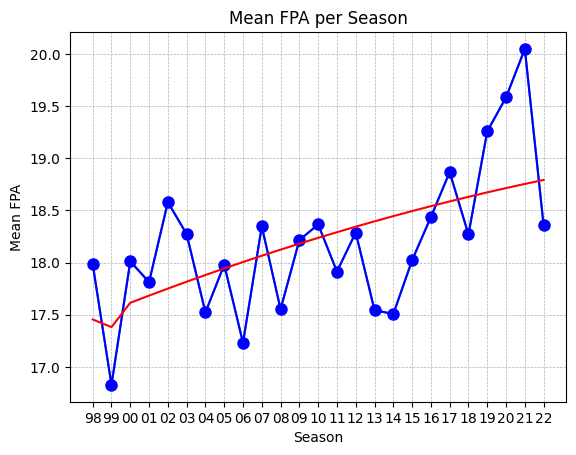

In [65]:
mean_FPAs = mean_FPA_per_year.to_list()
years = mean_FPA_per_year.index.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far

seasons_as_numbers = np.array([int(season) for season in seasons])
mean_FPs = mean_FPA_per_year.to_numpy()


plt.xticks(rotation=45)
plt.plot(seasons, mean_FPAs)

plt.xlabel("Season")
plt.ylabel("Mean FPA")
plt.title("Mean FPA per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_FPAs, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_FPA_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()



In [66]:
mean_TS_per_year = PStats_by_year['TS%'].mean()
mean_TS_per_year

Season
1997-98    0.491788
1998-99    0.473251
1999-00    0.488658
2000-01    0.481245
2001-02    0.487404
2002-03    0.475127
2003-04    0.478360
2004-05    0.494587
2005-06    0.498805
2006-07    0.502694
2007-08    0.497970
2008-09    0.510533
2009-10    0.507907
2010-11    0.506585
2011-12    0.496585
2012-13    0.495061
2013-14    0.502270
2014-15    0.502225
2015-16    0.519241
2016-17    0.522892
2017-18    0.525587
2018-19    0.528221
2019-20    0.533859
2020-21    0.536886
2021-22    0.522981
Name: TS%, dtype: float64

Above is the mean for true shooting percentage for every season. Below is a graphical representation of the progression of true shooting percentage throuout the seasons. Since the best fit line is positivly sloping (the result of the linear regression), it is safe to say that true shooting percentage, on average, increases year over year. This shows that offences are more effecent and there are less "bad shots". This is something that we should include in our model so we predict slightly higher offensive output averages in following years. Offense can be defined by point, 3P, 2P, FT among others.

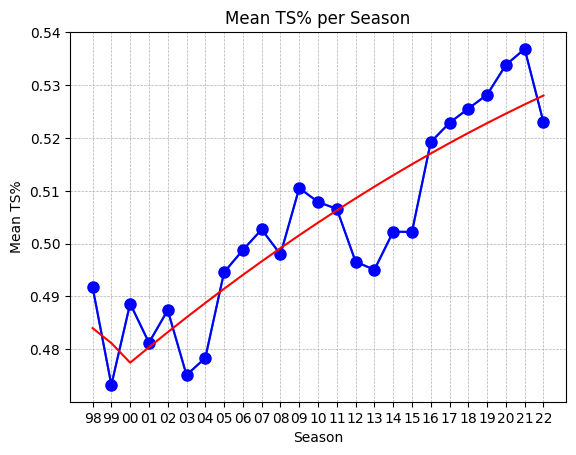

In [67]:
mean_TS = mean_TS_per_year.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far in my opinion

seasons_as_numbers = np.array([int(season) for season in seasons])

plt.xticks(rotation=45)
plt.plot(seasons, mean_TS)

plt.xlabel("Season")
plt.ylabel("Mean TS%")
plt.title("Mean TS% per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_TS, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_TS_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()


In [68]:
mean_BLK_per_year = PStats_by_year['BLK'].mean()
mean_TS_per_year

Season
1997-98    0.491788
1998-99    0.473251
1999-00    0.488658
2000-01    0.481245
2001-02    0.487404
2002-03    0.475127
2003-04    0.478360
2004-05    0.494587
2005-06    0.498805
2006-07    0.502694
2007-08    0.497970
2008-09    0.510533
2009-10    0.507907
2010-11    0.506585
2011-12    0.496585
2012-13    0.495061
2013-14    0.502270
2014-15    0.502225
2015-16    0.519241
2016-17    0.522892
2017-18    0.525587
2018-19    0.528221
2019-20    0.533859
2020-21    0.536886
2021-22    0.522981
Name: TS%, dtype: float64

Above is the mean for blocks for every season. Below is a graphical representation of the progression of blocks throuhout the seasons. Since the best fit line is negitivly sloping (the result of the linear regression), it is safe to say that blocks, on average, decreases year over year. But unlike the others, the variation is quite high, but the trend itself is evedent. This shows that offences are getting better (coraberated by the increase of true shooting precentage) and that there are less poor quality shots that have the posiblity to be blocked (this again is coraberated by TS%). This result makes sense because fantasy points has been increasign slowly, and not quickly, therefore at least one statistic had to be decreasing year by year. This shows that maybe blocks should be given more value in fantasty, as it is becoming more rare, and I would not be surprised if this standard is updated. This helps our model, because we can start putting less focus on blocks possibly.

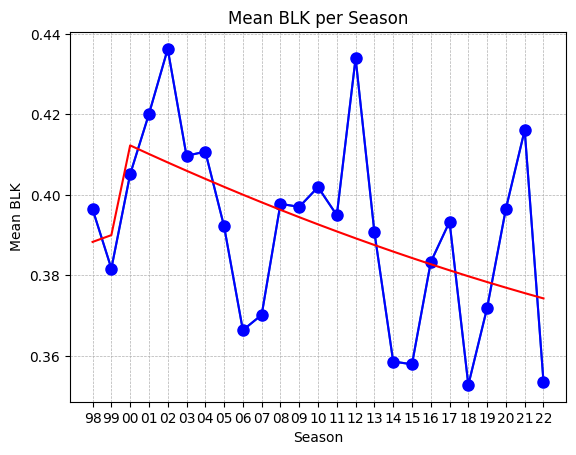

In [69]:
mean_BLK = mean_BLK_per_year.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far in my opinion

seasons_as_numbers = np.array([int(season) for season in seasons])

plt.xticks(rotation=45)
plt.plot(seasons, mean_BLK)

plt.xlabel("Season")
plt.ylabel("Mean BLK")
plt.title("Mean BLK per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_BLK, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_BLK_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()

#Machine Learning Analysis

In order to predict fantasy point totals and averages, we will use a k-nearest-neighbors regression, since this allows us to predict future fantasy point totals and averages based on other similar players. This uses a subset of the by_year data set which only includes players that played again in the following season. This distinction is made because it is useless to predict outcomes for players that are undraftable in fantasy leagues.

Our model will be trained on the following features: player, position, age, team, games played, games started, minutes played, field goals, field goals attempted, field goal percentage, three-point field goals, three-point field goals attempted, three-point percentage, two-point field goals, two-point field goals attempted, two-point field goal percentage, free throws, free throws attempted, free throw percentage, offensive rebounds, defensive rebounds, total rebounds, assists, steals, blocks, turnovers, personal fouls, points, and season.

We will first utilitize scikit-learn tools to perform a 10-fold cross validation in order to find the number of neighbors that minimizes the mean squared error of our model.

41    579171.853990
39    579212.042355
40    579336.641000
38    579360.027700
42    579513.267436
37    579700.998538
43    579928.858721
36    580089.905067
35    580182.288122
44    580207.591541
45    580437.933730
34    580544.456929
33    580635.900690
46    580861.021347
32    580918.526962
47    581358.597743
31    581878.597802
48    582134.393563
30    582460.763626
49    582574.338574
29    583372.831343
28    583417.687768
27    583559.140437
25    583602.338377
50    583638.233947
26    583660.372329
24    583766.766177
23    584420.415279
22    585163.858234
21    586294.609056
20    587748.992730
19    588869.688135
18    591901.363562
17    595328.780641
16    598883.587940
15    602645.512324
14    608133.756486
13    610745.586647
12    614040.899759
6     614047.218044
11    614466.105230
5     615568.435245
10    617776.465455
9     618019.477856
7     618287.474997
8     619493.165781
4     622125.529852
3     639104.593026
2     669460.175939
1     809786.554883


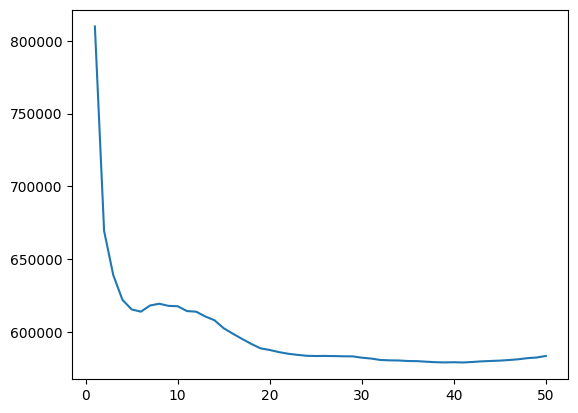

In [80]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

stats_if_next = by_year[by_year["next_FP"] != -1]

# get the features (in dict format) and the labels
features = ["Player", "Pos", "Age", "Tm", "G", "GS",
            "MP", "FG", "FGA", "FG%", "3P",
            "3PA", "3P%", "2P", "2PA", "2P%",
            "FT", "FTA", "FT%", "ORB", "DRB",
            "TRB", "AST", "STL", "BLK", "TOV",
            "PF", "PTS", "Season"]

X_dict = stats_if_next[features].to_dict(orient="records")
y = stats_if_next["next_FP"]

# specify the pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

# calculates estimate of test error based on 10-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y,
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse

ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

With the optimal number of neighbors calculated, we will now run a 41-nearest neighbors regression in order to predict the total fantasy points for each player every season in our dataset.

<Axes: xlabel='next_FP', ylabel='next_pred'>

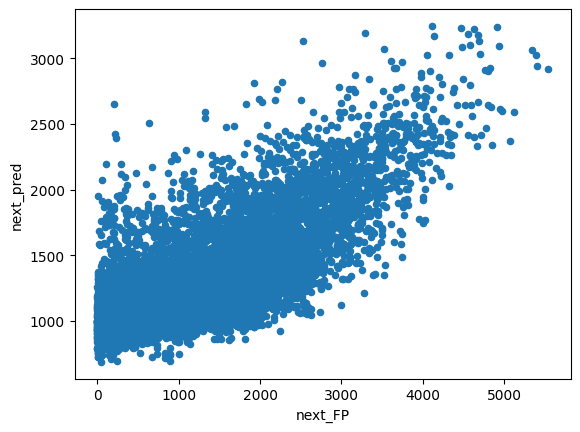

In [95]:
vec = DictVectorizer(sparse=False)
vec.fit(X_dict)
X_train = vec.transform(X_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Fit a 41-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=41)
model.fit(X_train_sc, y)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)

stats_if_next["next_pred"] = y_train_pred

stats_if_next.plot.scatter("next_FP", "next_pred")

The graph above plots the next season's predicted fantasy output against the actual next season's fantasy output. A line of best fit is overlayed, calculated using ordinary least squares. This graph is interactive, and allows users to zoom in to specific subsections.

As this graph shows, our predictions were relatively accurate. We can see that there is a moderately strong positive correlation between our predicted next season fantasy output and the actual next season fantasy output. With an $R^2$ value of 0.584, this model was able to account for 58.4% of the variance in a player's next season's total fantasy output.

Since turn-based drafts are typically used for fantasy basketball leagues, it can also be beneficial to order these predictions relative to other players by season as a measure of accuracy.

In [96]:
orders = {}

# create order variables for each year, both in terms of prediction order and actual order
for year in PStats_by_year.groups:
    # isolate each season in terms of the three variables we are interested in for this task
    temp = stats_if_next[stats_if_next["Season"] == year]
    player_next_pred = temp[["Player", "next_pred", "next_FP"]]

    # create order statistics for the actual outcome
    sort_next = player_next_pred.sort_values(by="next_FP", ascending=False)
    next_order = []
    for i in range(len(sort_next)):
        next_order.append(i + 1)
    sort_next.insert(2, "Outcome Order", next_order, True)
    sort_next = sort_next.drop(columns=['next_FP', 'next_pred'])

    # create order statistics for the predicted outcome
    sort_next_pred = player_next_pred.sort_values(by="next_pred", ascending=False)
    next_pred_order = []
    for i in range(len(sort_next)):
        next_pred_order.append(i + 1)
    sort_next_pred.insert(1, "Prediction Order", next_pred_order, True)
    sort_next_pred = sort_next_pred.drop(columns=['next_FP', 'next_pred'])

    # combine the two together
    temp2 = pd.merge(player_next_pred, sort_next, on="Player", how="outer")
    final = pd.merge(temp2, sort_next_pred, on="Player", how="outer")

    orders[year] = final

display(orders.get("2014-15").sort_values(by="Prediction Order", ascending=True)[:25])


,Player,next_pred,next_FP,Outcome Order,Prediction Order
791,LeBron James,3167.080488,4134.4,5,1
1973,Russell Westbrook,2912.524390,4760.0,3,2
732,James Harden,2900.553659,4797.0,2,3
1227,Chris Paul,2716.412195,3922.0,8,4
179,Kobe Bryant*,2653.746341,1821.6,139,5
370,Stephen Curry,2597.314634,4969.1,1,6
476,Kevin Durant,2410.270732,4125.6,6,7
944,Damian Lillard,2362.241463,3525.0,12,8
1940,Dwyane Wade,2353.824390,2715.8,42,9
1969,John Wall,2345.653659,4142.6,4,10


For example, here is what our model expects to be the top 25 players of the 2015-16 season based off the data from the 2014-15 season. By altering the last line of code above, you can output our model's order of expected total fantasy points for any amount of players for any season. Keep in mind, the year listed in the code should be the last completed season before the fantasy season you plan to predict values for.

While fantasy point total is the most important metric for answering our question, we can see that there is a decent amount of noise in our data. This is likely due to the randomness involved with injuries. While some players might be more injury prone than others, and while certain players might tend to utilize load management to a greater extent, there is a large amount of randomness involved. For example, there are many points in the top left quadrant of the graph where players score far less than their predicted total values. These are largely due to random injuries which cause these players to miss significant amounts of time, dramatically cutting back their fantasy output.

While we are able to account for injury and load management prone players to some extent by including features such as Games ("G") and minutes played ("MP"), there is still a large amount of randomness that we are unable to account for.

For this reason, it can also be useful to predict and sort by fantasy point average. This allows each individual to assess their own level of risk for injury and load management prone players. This takes away much of the randomness of injury since the missed games do not affect average fantasy output. To do this, we will repeat our cross-validation in order to determine the most appropriate k-nearest-neighbors model for best predicting average fantasy points.

4     70.851980
5     71.580055
3     71.940200
6     72.619045
7     74.176003
2     74.316684
8     75.251014
9     76.037300
10    76.701672
11    76.841965
18    76.903905
19    76.909697
17    76.944248
16    76.986048
20    77.101530
15    77.205435
21    77.247843
13    77.320527
12    77.379790
22    77.389536
14    77.431368
23    77.622529
24    77.829645
25    78.145376
26    78.329861
27    78.523493
28    78.771989
46    78.781426
40    78.798419
45    78.798502
41    78.809349
42    78.820520
39    78.821052
47    78.822961
43    78.830049
44    78.834069
38    78.865466
48    78.882269
49    78.915586
29    78.942013
37    78.944601
35    78.962830
34    78.979767
32    78.988088
36    78.988103
33    78.989112
30    78.995090
31    79.007015
50    79.025795
1     87.511045
dtype: float64

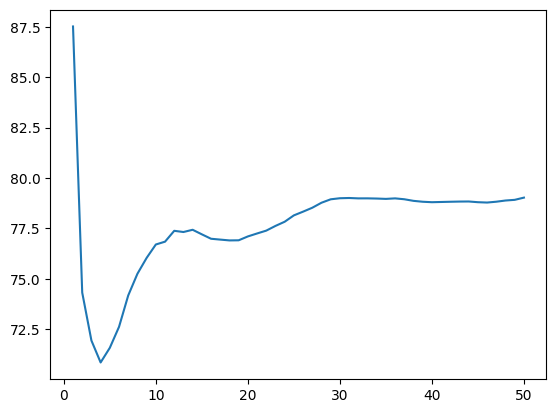

In [97]:
# get the features (in dict format) and the labels
# (do not split into training and validation sets)
features = ["Player", "Pos", "Age", "Tm", "G", "GS",
            "MP", "FG", "FGA", "FG%", "3P",
            "3PA", "3P%", "2P", "2PA", "2P%",
            "FT", "FTA", "FT%", "ORB", "DRB",
            "TRB", "AST", "STL", "BLK", "TOV",
            "PF", "PTS", "Season"]

X_dict = stats_if_next[features].to_dict(orient="records")
y = stats_if_next["next_FPA"]

# specify the pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

# calculates estimate of test error based on 10-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y,
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse

ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

With the optimal number of neighbors calculated, we will now run a 4-nearest neighbors regression in order to predict the average fantasy points for each player every season in our dataset.

<Axes: xlabel='next_FPA', ylabel='next_pred_avg'>

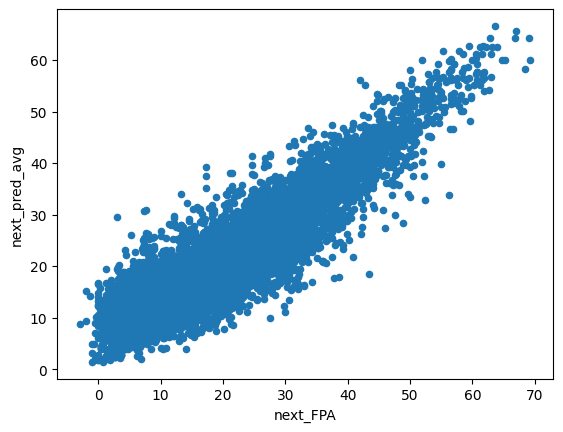

In [99]:
vec = DictVectorizer(sparse=False)
vec.fit(X_dict)
X_train = vec.transform(X_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Fit a 4-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train_sc, y)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)

stats_if_next["next_pred_avg"] = y_train_pred

y_train_pred = model.predict(X_train_sc)

stats_if_next["next_pred_avg"] = y_train_pred

stats_if_next.plot.scatter("next_FPA", "next_pred_avg")

As this graph shows, our predictions were even more accurate than for our total fantasy points prediction. We can see that there is a very strong positive correlation between our predicted next season average fantasy output and the actual next season average fantasy output. With an $R^2$ value of 0.837, this model was able to account for 83.7% of the variance in a player's next season's total fantasy output. While noise will still exist naturally, our predictions are much more uniform with the actual outcomes.

And once again, we can order these predictions relative to their peers by season to measure accuracy in a draft scenario.

In [100]:
orders_avg = {}

# create order variables for each year, both in terms of prediction order and actual order
for year in PStats_by_year.groups:
    # isolate each season in terms of the three variables we are interested in for this task
    temp = stats_if_next[stats_if_next["Season"] == year]
    player_next_pred = temp[["Player", "next_pred_avg", "next_FPA"]]

    # create order statistics for the actual outcome
    sort_next = player_next_pred.sort_values(by="next_FPA", ascending=False)
    next_order = []
    for i in range(len(sort_next)):
        next_order.append(i + 1)
    sort_next.insert(2, "Outcome Order", next_order, True)
    sort_next = sort_next.drop(columns=['next_FPA', 'next_pred_avg'])

    # create order statistics for the predicted outcome
    sort_next_pred = player_next_pred.sort_values(by="next_pred_avg", ascending=False)
    next_pred_order = []
    for i in range(len(sort_next)):
        next_pred_order.append(i + 1)
    sort_next_pred.insert(1, "Prediction Order", next_pred_order, True)
    sort_next_pred = sort_next_pred.drop(columns=['next_FPA', 'next_pred_avg'])

    # combine the two together
    temp2 = pd.merge(player_next_pred, sort_next, on="Player", how="outer")
    final = pd.merge(temp2, sort_next_pred, on="Player", how="outer")

    orders_avg[year] = final

display(orders_avg.get("2019-20").sort_values(by="Prediction Order", ascending=True)[:25])

,Player,next_pred_avg,next_FPA,Outcome Order,Prediction Order
706,James Harden,64.300,62.8,2,1
8,Giannis Antetokounmpo,62.600,61.2,3,2
917,Nikola Jokić,60.100,64.8,1,3
856,LeBron James,59.875,56.2,7,4
494,Luka Dončić,56.150,59.0,5,5
1464,Russell Westbrook,55.175,61.2,4,6
532,Joel Embiid,55.125,54.3,10,7
1363,Karl-Anthony Towns,54.125,53.0,11,8
822,Kyrie Irving,53.750,54.9,8,9
431,Stephen Curry,53.200,58.1,6,10


And here is what our model expects to be the top 25 players of the 2020-21 season based off fantasy point average using the data from the 2019-20 season. Any length of list can again be created for any season by editing the last line.

Utilizing this ordering, the individual drafting can get a much deeper understanding of which players will score the most points per game while keeping in mind the risks that might come with drafting an injury prone player and analyzing these risks and rewards according to their own preferences.

#Conclusion

As our models have shown, these basic box score statistics have significant predictive power for fantasy basketball score prediction. And, while there is a level of error within our model, it fairs very well considering the inherent randomness of sports performance and health.